In [1]:
import os
import math

import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=1000)

rd_seed = 333

In [2]:
path_file = os.sep.join(['created_data', 'matrix_bak_2015.csv'])
matrix = pd.read_csv(path_file, sep=",", index_col='studium_id') 

In [3]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 12375406 to 11740806
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pohlavi_kod             3936 non-null   int64  
 1   je_cech                 3936 non-null   int64  
 2   datum_zahajeni          3936 non-null   int64  
 3   rok_maturity            3936 non-null   int64  
 4   maturita_nastup_rozdil  3936 non-null   int64  
 5   gymnazium               3936 non-null   int64  
 6   praha                   3936 non-null   int64  
 7   scio                    3936 non-null   int64  
 8   olym                    3936 non-null   int64  
 9   zkouska                 3936 non-null   int64  
 10  prominuti               3936 non-null   int64  
 11  dostudoval_uspesne      3936 non-null   int64  
 12  BI-PA1                  3866 non-null   float64
 13  BI-PAI                  3867 non-null   float64
 14  BI-CAO                  3869 

## Selekce atributů

In [4]:
matrix = matrix.drop(columns=['dostudoval_uspesne'])

## Doplnění NaN hodnot

In [5]:
imp = KNNImputer(n_neighbors=5)
matrix = pd.DataFrame(imp.fit_transform(matrix), index=matrix.index, columns=matrix.columns)

In [6]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 12375406 to 11740806
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pohlavi_kod             3936 non-null   float64
 1   je_cech                 3936 non-null   float64
 2   datum_zahajeni          3936 non-null   float64
 3   rok_maturity            3936 non-null   float64
 4   maturita_nastup_rozdil  3936 non-null   float64
 5   gymnazium               3936 non-null   float64
 6   praha                   3936 non-null   float64
 7   scio                    3936 non-null   float64
 8   olym                    3936 non-null   float64
 9   zkouska                 3936 non-null   float64
 10  prominuti               3936 non-null   float64
 11  BI-PA1                  3936 non-null   float64
 12  BI-PAI                  3936 non-null   float64
 13  BI-CAO                  3936 non-null   float64
 14  BI-PS1                  3936 

In [7]:
matrix

,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12375406,0.0,1.0,2015.0,2009.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,2.5,2.0,2.5,3.0,2.5,2.5,3.0,2.5,2.5,2.5,2.8,3.0,3.0,3.0,2.5,2.5,2.0,1.0,2.0,2.0
11736906,0.0,1.0,2015.0,2009.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,3.5,3.1,2.6,3.7,3.7,3.2,3.8,3.0,2.5,3.2,2.9,1.1,2.8,2.5
12032306,0.0,1.0,2015.0,2007.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.2,2.7,3.7,3.4,3.8,3.5,3.1,2.7,3.2,2.8,1.4,2.3,3.6
15613006,0.0,1.0,2018.0,2009.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.5,1.0,2.5,1.5,2.0,1.5,1.5,1.0,3.0,1.5,2.5,2.0,2.5,1.5,2.5,1.5,1.8,2.0,1.5
12948006,1.0,1.0,2016.0,2010.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.5,2.5,1.5,2.5,2.5,2.0,1.0,3.0,2.5,2.0,2.0,2.5,2.5,2.5,2.0,1.0,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18639206,0.0,1.0,2020.0,2020.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,2.5,1.5,3.0,2.0,4.0,4.0,2.5,4.0,4.0,4.0,4.0,4.0,4.0,3.8,3.6,3.8,1.4,2.9,1.9
11677106,0.0,1.0,2015.0,2003.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.5,1.0,4.0,4.0,4.0,2.8,3.1,2.5,3.0,2.5,3.0,2.5,2.5,2.4,2.9,2.0,1.8,1.9,2.6
13513806,0.0,1.0,2016.0,2006.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,4.0,4.0,4.0,3.1,3.0,2.8,3.3,2.5,3.2,2.6,2.5,2.4,2.9,1.9,1.4,1.8,3.1


## Zaokrouhlení doplněných hodnot

In [8]:
grades = [1, 1.5, 2, 2.5, 3, 4]

In [9]:
def custom_round(value):
    return min(grades, key=lambda x:abs(x-value))

In [10]:
matrix.loc[:, 'BI-PA1':'BI-EMP'] = matrix.loc[:, 'BI-PA1':'BI-EMP'].applymap(custom_round)

In [11]:
matrix

,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12375406,0.0,1.0,2015.0,2009.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,2.5,2.0,2.5,3.0,2.5,2.5,3.0,2.5,2.5,2.5,3.0,3.0,3.0,3.0,2.5,2.5,2.0,1.0,2.0,2.0
11736906,0.0,1.0,2015.0,2009.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,2.5,4.0,4.0,3.0,4.0,3.0,2.5,3.0,3.0,1.0,3.0,2.5
12032306,0.0,1.0,2015.0,2007.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,2.5,4.0,3.0,4.0,3.0,3.0,2.5,3.0,3.0,1.5,2.5,4.0
15613006,0.0,1.0,2018.0,2009.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.5,1.0,2.5,1.5,2.0,1.5,1.5,1.0,3.0,1.5,2.5,2.0,2.5,1.5,2.5,1.5,2.0,2.0,1.5
12948006,1.0,1.0,2016.0,2010.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.5,2.5,1.5,2.5,2.5,2.0,1.0,3.0,2.5,2.0,2.0,2.5,2.5,2.5,2.0,1.0,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18639206,0.0,1.0,2020.0,2020.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,2.5,1.5,3.0,2.0,4.0,4.0,2.5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.5,3.0,2.0
11677106,0.0,1.0,2015.0,2003.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.5,1.0,4.0,4.0,4.0,3.0,3.0,2.5,3.0,2.5,3.0,2.5,2.5,2.5,3.0,2.0,2.0,2.0,2.5
13513806,0.0,1.0,2016.0,2006.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,2.5,3.0,2.5,2.5,2.5,3.0,2.0,1.5,2.0,3.0


In [12]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 12375406 to 11740806
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pohlavi_kod             3936 non-null   float64
 1   je_cech                 3936 non-null   float64
 2   datum_zahajeni          3936 non-null   float64
 3   rok_maturity            3936 non-null   float64
 4   maturita_nastup_rozdil  3936 non-null   float64
 5   gymnazium               3936 non-null   float64
 6   praha                   3936 non-null   float64
 7   scio                    3936 non-null   float64
 8   olym                    3936 non-null   float64
 9   zkouska                 3936 non-null   float64
 10  prominuti               3936 non-null   float64
 11  BI-PA1                  3936 non-null   float64
 12  BI-PAI                  3936 non-null   float64
 13  BI-CAO                  3936 non-null   float64
 14  BI-PS1                  3936 

### Nastavení nepředmětových atributů na kategorické

In [13]:
# ordinální
attr_category = pd.api.types.CategoricalDtype(categories=[0, 1], ordered=False)
# pohlavi_kod
matrix['pohlavi_kod'] = matrix['pohlavi_kod'].astype(attr_category)
# scio
matrix['scio'] = matrix['scio'].astype(attr_category)
# olym
matrix['olym'] = matrix['olym'].astype(attr_category)
# zkouska
matrix['zkouska'] = matrix['zkouska'].astype(attr_category)
# prominuti
matrix['prominuti'] = matrix['prominuti'].astype(attr_category)

In [14]:
# ordinální
attr_category = pd.api.types.CategoricalDtype(categories=[-1, 0, 1], ordered=False)
# je_cech
matrix['je_cech'] = matrix['je_cech'].astype(attr_category)
# gymnazium
matrix['gymnazium'] = matrix['gymnazium'].astype(attr_category)
# praha
matrix['praha'] = matrix['praha'].astype(attr_category)

In [15]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 12375406 to 11740806
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   pohlavi_kod             3936 non-null   category
 1   je_cech                 3936 non-null   category
 2   datum_zahajeni          3936 non-null   float64 
 3   rok_maturity            3936 non-null   float64 
 4   maturita_nastup_rozdil  3936 non-null   float64 
 5   gymnazium               3936 non-null   category
 6   praha                   3936 non-null   category
 7   scio                    3936 non-null   category
 8   olym                    3936 non-null   category
 9   zkouska                 3936 non-null   category
 10  prominuti               3936 non-null   category
 11  BI-PA1                  3936 non-null   float64 
 12  BI-PAI                  3936 non-null   float64 
 13  BI-CAO                  3936 non-null   float64 
 14  BI-PS1       

## Rozdělení datasetu

In [16]:
train, test = train_test_split(matrix, test_size=0.2, shuffle=True)

## Nastavení param_grid 

In [17]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'] 
}
param_comb = ParameterGrid(param_grid)

In [18]:
courses = np.array(matrix.columns.unique())

In [19]:
def get_prediction(course):
    # rozdeleni datasetu
    Xtrain_course = train.drop(columns=course)
    ytrain_course = train[course]
    Xtest_course = test.drop(columns=course)
    ytest_course = test[course]
    
    # zmena priznaku na kategoricke ordinalni
    grades_category = pd.api.types.CategoricalDtype(categories=[1, 1.5, 2, 2.5, 3, 4], ordered=True)
    course_arr = np.array(course)
    feature_courses = np.setdiff1d(course_arr, courses)
    for feature in feature_courses:
        Xtrain_course[feature] = Xtrain_course[feature].astype(grades_category)
        Xtest_course[feature] = Xtest_course[feature].astype(grades_category)
    
    # create model
    model = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
    model.fit(Xtrain_course, ytrain_course)
    
    # get prediction
    y_train_predicted = model.predict(Xtrain_course)
    y_test_predicted = model.predict(Xtest_course)
    
    # get RMSE
    train_err = np.sqrt(mean_squared_error(model.predict(Xtrain_course), np.array(ytrain_course)))
    test_err = np.sqrt(mean_squared_error(model.predict(Xtest_course), np.array(ytest_course)))
    return model, train_err, test_err

## PA1

In [20]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 12375406 to 11740806
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   pohlavi_kod             3936 non-null   category
 1   je_cech                 3936 non-null   category
 2   datum_zahajeni          3936 non-null   float64 
 3   rok_maturity            3936 non-null   float64 
 4   maturita_nastup_rozdil  3936 non-null   float64 
 5   gymnazium               3936 non-null   category
 6   praha                   3936 non-null   category
 7   scio                    3936 non-null   category
 8   olym                    3936 non-null   category
 9   zkouska                 3936 non-null   category
 10  prominuti               3936 non-null   category
 11  BI-PA1                  3936 non-null   float64 
 12  BI-PAI                  3936 non-null   float64 
 13  BI-CAO                  3936 non-null   float64 
 14  BI-PS1       

In [21]:
knn_pa1, train_pa1_err, test_pa1_err = get_prediction('BI-PA1')

In [22]:
print('RMSE reg (train):', train_pa1_err)
print('RMSE reg (test):', test_pa1_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.5008828992871494


## PAI

In [23]:
knn_pai, train_pai_err, test_pai_err = get_prediction('BI-PAI')

In [24]:
print('RMSE reg (train):', train_pai_err)
print('RMSE reg (test):', test_pai_err)

RMSE reg (train): 0.053716197767374144
RMSE reg (test): 0.5071909548125122


## ZMA

In [25]:
knn_zma, train_zma_err, test_zma_err = get_prediction('BI-PAI')

In [26]:
print('RMSE reg (train):', train_zma_err)
print('RMSE reg (test):', test_zma_err)

RMSE reg (train): 0.053716197767374144
RMSE reg (test): 0.5071909548125122


## MLO

In [27]:
knn_mlo, train_mlo_err, test_mlo_err = get_prediction('BI-MLO')

In [28]:
print('RMSE reg (train):', train_mlo_err)
print('RMSE reg (test):', test_mlo_err)

RMSE reg (train): 0.01890422594492761
RMSE reg (test): 0.5578830354000139


## CAO

In [29]:
knn_cao, train_cao_err, test_cao_err = get_prediction('BI-CAO')

In [30]:
print('RMSE reg (train):', train_cao_err)
print('RMSE reg (test):', test_cao_err)

RMSE reg (train): 0.04616256745976025
RMSE reg (test): 0.5696677332061445


## PS1

In [31]:
knn_ps1, train_ps1_err, test_ps1_err = get_prediction('BI-PS1')

In [32]:
print('RMSE reg (train):', train_ps1_err)
print('RMSE reg (test):', test_ps1_err)

RMSE reg (train): 0.02357771221602733
RMSE reg (test): 0.5177530256355164


## PA2

In [33]:
knn_pa2, train_pa2_err, test_pa2_err = get_prediction('BI-PA2')

In [34]:
print('RMSE reg (train):', train_pa2_err)
print('RMSE reg (test):', test_pa2_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.43602497842078053


## LIN

In [35]:
knn_lin, train_lin_err, test_lin_err = get_prediction('BI-LIN')

In [36]:
print('RMSE reg (train):', train_lin_err)
print('RMSE reg (test):', test_lin_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.38446926265630615


## DBS

In [37]:
knn_dbs, train_dbs_err, test_dbs_err = get_prediction('BI-DBS')

In [38]:
print('RMSE reg (train):', train_dbs_err)
print('RMSE reg (test):', test_dbs_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.5091591250752624


## SAP

In [39]:
knn_sap, train_sap_err, test_sap_err = get_prediction('BI-SAP')

In [40]:
print('RMSE reg (train):', train_sap_err)
print('RMSE reg (test):', test_sap_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.5930227898611584


## AAG

In [41]:
knn_aag, train_aag_err, test_aag_err = get_prediction('BI-AAG')

In [42]:
print('RMSE reg (train):', train_aag_err)
print('RMSE reg (test):', test_aag_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.39682451173566785


## AG1

In [43]:
knn_ag1, train_ag1_err, test_ag1_err = get_prediction('BI-AG1')

In [44]:
print('RMSE reg (train):', train_ag1_err)
print('RMSE reg (test):', test_ag1_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.3736865405264173


## ZDM

In [45]:
knn_zdm, train_zdm_err, test_zdm_err = get_prediction('BI-ZDM')

In [46]:
print('RMSE reg (train):', train_zdm_err)
print('RMSE reg (test):', test_zdm_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.3565613581119894


## OSY

In [47]:
knn_osy, train_osy_err, test_osy_err = get_prediction('BI-OSY')

In [48]:
print('RMSE reg (train):', train_osy_err)
print('RMSE reg (test):', test_osy_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.39734731344513


## PSI

In [49]:
knn_psi, train_psi_err, test_psi_err = get_prediction('BI-PSI')

In [50]:
print('RMSE reg (train):', train_psi_err)
print('RMSE reg (test):', test_psi_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.40070317978761183


## BEZ

In [51]:
knn_bez, train_bez_err, test_bez_err = get_prediction('BI-BEZ')

In [52]:
print('RMSE reg (train):', train_bez_err)
print('RMSE reg (test):', test_bez_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.40170399919261185


## PST

In [53]:
knn_pst, train_pst_err, test_pst_err = get_prediction('BI-PST')

In [54]:
print('RMSE reg (train):', train_pst_err)
print('RMSE reg (test):', test_pst_err)

RMSE reg (train): 0.012602817296618407
RMSE reg (test): 0.4209374782444171


## DPR

In [55]:
knn_dpr, train_dpr_err, test_dpr_err = get_prediction('BI-DPR')

In [56]:
print('RMSE reg (train):', train_dpr_err)
print('RMSE reg (test):', test_dpr_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.39333154114628704


## EMP

In [57]:
knn_emp, train_emp_err, test_emp_err = get_prediction('BI-EMP')

In [58]:
print('RMSE reg (train):', train_emp_err)
print('RMSE reg (test):', test_emp_err)

RMSE reg (train): 0.0
RMSE reg (test): 0.5194799002452466


## SI1.2

In [59]:
knn_si1, train_si1_err, test_si1_err = get_prediction('BI-SI1.2')

In [60]:
print('RMSE reg (train):', train_si1_err)
print('RMSE reg (test):', test_si1_err)

RMSE reg (train): 0.006301408648309204
RMSE reg (test): 0.41671236371495163


# Výsledky

No handles with labels found to put in legend.


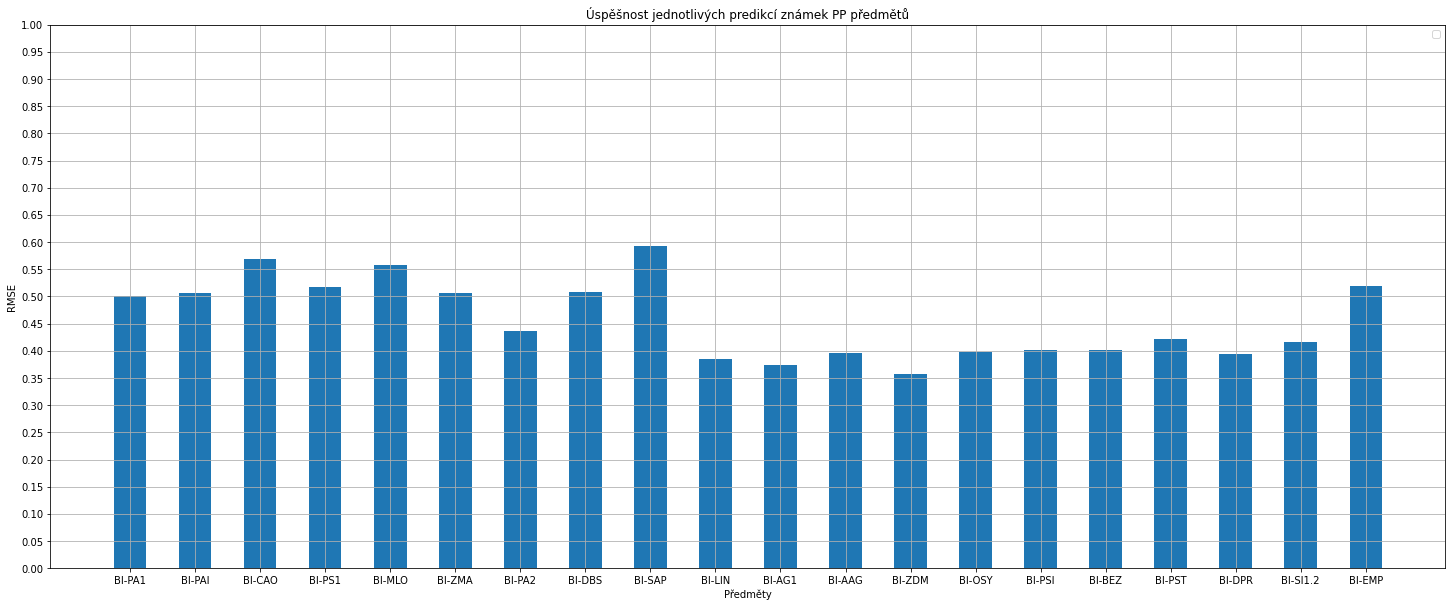

In [61]:
y = [
    test_pa1_err,
    test_pai_err,
    test_cao_err,
    test_ps1_err,
    test_mlo_err,
    test_zma_err,
    test_pa2_err,
    test_dbs_err,
    test_sap_err,
    test_lin_err,
    test_ag1_err,
    test_aag_err,
    test_zdm_err,
    test_osy_err,
    test_psi_err,
    test_bez_err,
    test_pst_err,
    test_dpr_err,
    test_si1_err,
    test_emp_err
]

x = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA', 'BI-PA2',
       'BI-DBS', 'BI-SAP', 'BI-LIN', 'BI-AG1', 'BI-AAG', 'BI-ZDM', 'BI-OSY',
       'BI-PSI', 'BI-BEZ', 'BI-PST', 'BI-DPR', 'BI-SI1.2', 'BI-EMP']
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects_dt = ax.bar(x , y, width)

y_values = np.arange(0.0, 1.05, 0.05)

ax.set_ylabel('RMSE')
ax.set_xlabel('Předměty')
ax.set_title('Úspěšnost jednotlivých predikcí známek PP předmětů')
ax.set_xticks(x)
plt.yticks(y_values)
ax.legend(loc='best')
ax.grid(True)

plt.ylim(ymin=0)
plt.ylim(ymax=1)

fig.set_size_inches(25,10)
plt.show()

In [62]:
sum(y)/20

0.45802664726588427